**Plant Disease Detection using CNN Model**

**1**. **Uploading** **Dataset**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arpitarout01","key":"2f42f92b17686d282ccb47de67eba0ba"}'}

In [ ]:
!rm -f /root/.kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os

if os.path.exists("/root/.kaggle/kaggle.json"):
    print("kaggle.json is placed correctly!")
else:
    print("Error: kaggle.json not found.")


kaggle.json is placed correctly!


In [ ]:
import shutil
import os

if not os.path.exists("/root/.kaggle/kaggle.json"):
    shutil.move("kaggle.json", "/root/.kaggle/")
    print("kaggle.json has been moved successfully.")
else:
    print("kaggle.json already exists in the destination.")

kaggle.json already exists in the destination.


**2. Downloading Dataset**

In [ ]:
!kaggle datasets download -d mohitsingh1804/plantvillage

Dataset URL: https://www.kaggle.com/datasets/mohitsingh1804/plantvillage
License(s): GPL-2.0


**3. Extracting files from Zip file**

In [ ]:
!unzip -q plantvillage.zip -d plantvillage_data

In [ ]:
!ls plantvillage_data

PlantVillage


In [ ]:
!ls plantvillage_data/PlantVillage

train  val


**4. Importing Libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**5. Data Preprocessing**

1.   Training Image Preprocessing





In [ ]:
import random

In [ ]:
import os, shutil
from sklearn.model_selection import train_test_split

val_dir = '/content/plantvillage_data/PlantVillage/val'
new_val_dir = '/content/plantvillage_data/PlantVillage/new_val'
test_dir = '/content/plantvillage_data/PlantVillage/test'

# Make new folders
os.makedirs(new_val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

    # Create class folders
    os.makedirs(os.path.join(new_val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Copy files
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(new_val_dir, class_name, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))


In [ ]:
train_dir = "/content/plantvillage_data/PlantVillage/train"
val_dir = "/content/plantvillage_data/PlantVillage/new_val"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(128, 128),
    batch_size=8,
    shuffle=True,
    seed=123
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size=(128, 128),
    batch_size=8,
    shuffle=True,
    seed=123
)


Found 43444 files belonging to 38 classes.
Found 8676 files belonging to 38 classes.


In [ ]:
for x,y in train_dataset:
  print(x,x.shape)
  print(y, y.shape)
  break

tf.Tensor(
[[[[ 80.75  86.75  84.75]
   [ 90.25  96.25  94.25]
   [ 87.75  93.75  91.75]
   ...
   [110.   114.   113.  ]
   [110.25 114.25 113.25]
   [108.75 112.75 111.75]]

  [[ 76.5   82.5   80.5 ]
   [ 78.25  84.25  82.25]
   [ 81.25  87.25  85.25]
   ...
   [107.5  111.5  110.5 ]
   [106.   110.   109.  ]
   [108.   112.   111.  ]]

  [[ 80.25  86.25  84.25]
   [ 77.75  83.75  81.75]
   [ 82.25  88.25  86.25]
   ...
   [108.75 112.75 111.75]
   [107.25 111.25 110.25]
   [103.25 107.25 106.25]]

  ...

  [[ 84.    81.    76.  ]
   [ 80.25  77.25  72.25]
   [ 80.5   77.5   72.5 ]
   ...
   [102.   101.    97.  ]
   [102.5  101.5   97.5 ]
   [104.5  103.5   99.5 ]]

  [[ 84.25  81.25  76.25]
   [ 87.    84.    79.  ]
   [ 86.5   83.5   78.5 ]
   ...
   [ 99.75  98.75  94.75]
   [103.5  102.5   98.5 ]
   [104.25 103.25  99.25]]

  [[ 88.5   85.5   80.5 ]
   [ 85.    82.    77.  ]
   [ 83.5   80.5   75.5 ]
   ...
   [ 99.5   98.5   94.5 ]
   [106.25 105.25 101.25]
   [102.25 101.25  9

**6. Data Visualisation**


*   Structuring the Dataset using Pandas



In [ ]:
path="/content/plantvillage_data/PlantVillage/train"
image_data=[]

for class_name in os.listdir(path):
  class_path=os.path.join(path,class_name)
  if os.path.isdir(class_path):
    for image_name in os.listdir(class_path):
      image_path=os.path.join(class_path,image_name)
      image_data.append([image_path,class_name])

df=pd.DataFrame(image_data,columns=["image_path","class"])

print(df.head())

                                          image_path  \
0  /content/plantvillage_data/PlantVillage/train/...   
1  /content/plantvillage_data/PlantVillage/train/...   
2  /content/plantvillage_data/PlantVillage/train/...   
3  /content/plantvillage_data/PlantVillage/train/...   
4  /content/plantvillage_data/PlantVillage/train/...   

                          class  
0  Tomato___Tomato_mosaic_virus  
1  Tomato___Tomato_mosaic_virus  
2  Tomato___Tomato_mosaic_virus  
3  Tomato___Tomato_mosaic_virus  
4  Tomato___Tomato_mosaic_virus  




*   Displaying Dataset Information



In [ ]:
print(f"Total number of images: {len(df)}")

Total number of images: 43444


In [ ]:
print(df['class'].value_counts())

class
Orange___Haunglongbing_(Citrus_greening)              4405
Tomato___Tomato_Yellow_Leaf_Curl_Virus                4286
Soybean___healthy                                     4072
Peach___Bacterial_spot                                1838
Tomato___Bacterial_spot                               1702
Tomato___Late_blight                                  1527
Squash___Powdery_mildew                               1468
Tomato___Septoria_leaf_spot                           1417
Tomato___Spider_mites Two-spotted_spider_mite         1341
Apple___healthy                                       1316
Tomato___healthy                                      1273
Blueberry___healthy                                   1202
Pepper,_bell___healthy                                1183
Tomato___Target_Spot                                  1123
Grape___Esca_(Black_Measles)                          1107
Corn_(maize)___Common_rust_                            953
Grape___Black_rot                                 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43444 entries, 0 to 43443
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  43444 non-null  object
 1   class       43444 non-null  object
dtypes: object(2)
memory usage: 678.9+ KB
None




*  Displaying Images



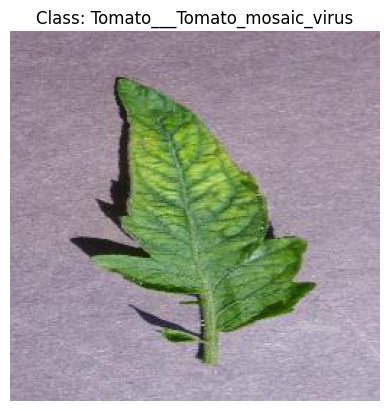

In [ ]:
import cv2

ip=df.iloc[0]['image_path']
image=cv2.imread(ip)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(f"Class: {df.iloc[0]['class']}")
plt.axis("off")
plt.show()



*   Handling Data for Model Training



In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

**7. Model Building**

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, SeparableConv2D, GlobalAveragePooling2D, BatchNormalization, Activation, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=256,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units=38, activation='softmax'))

**8. Compiling Model**

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
optimizer = mixed_precision.LossScaleOptimizer(optimizer)

In [ ]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,991,366 (68.63 MB)

 Trainable params: 17,990,406 (68.63 MB)

 Non-trainable params: 960 (3.75 KB)

**9. Model Training**

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y_train = []  # Initialize an empty list to store labels

# Iterate through the dataset to extract labels
for images, labels in train_dataset:
    y_train.extend(np.argmax(labels.numpy(), axis=1))  # Get class indices from one-hot encoded labels

y_train = np.array(y_train)  # Convert to NumPy array

# Now you can compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [ ]:
training_history=model.fit(train_dataset,validation_data=val_dataset,epochs=10, class_weight=class_weights, callbacks=[reduce_lr,early_stop])

Epoch 1/10
5431/5431 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - accuracy: 0.9061 - loss: 0.3076 - val_accuracy: 0.8789 - val_loss: 0.4870 - learning_rate: 1.0000e-04
Epoch 2/10
5431/5431 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9282 - loss: 0.2349 - val_accuracy: 0.7540 - val_loss: 1.4600 - learning_rate: 1.0000e-04
Epoch 3/10
5431/5431 ━━━━━━━━━━━━━━━━━━━━ 81s 12ms/step - accuracy: 0.9421 - loss: 0.1933 - val_accuracy: 0.9089 - val_loss: 0.4080 - learning_rate: 1.0000e-04
Epoch 4/10
5431/5431 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step - accuracy: 0.9518 - loss: 0.1681 - val_accuracy: 0.9389 - val_loss: 0.2273 - learning_rate: 1.0000e-04
Epoch 5/10
5431/5431 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9566 - loss: 0.1461 - val_accuracy: 0.9503 - val_loss: 0.2252 - learning_rate: 1.0000e-04
Epoch 6/10
5431/5431 ━━━━━━━━━━━━━━━━━━━━ 68s 12ms/step - accuracy: 0.9640 - loss: 0.1303 - val_accuracy: 0.9323 - val_loss: 0.3608 - learning_rate: 1.0000e-04
Epoch 7/10
5431/5431 ━━━━━━━━━━━━━━━━━━━

**10. Model Evaluation**

In [ ]:
train_loss, train_acc=model.evaluate(train_dataset)

5431/5431 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.9991 - loss: 0.0047


In [ ]:
print(train_loss, train_acc)

0.0038546454161405563 0.999286413192749


In [ ]:
validation_loss, validation_acc=model.evaluate(val_dataset)

1085/1085 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9710 - loss: 0.1151


In [ ]:
print(validation_loss, validation_acc)

0.11658918112516403 0.9732595682144165


**11. Saving Model**

In [ ]:
model.save("/content/plant_disease_detection_model.keras", save_format=tf)

In [ ]:
training_history.history

{'accuracy': [0.9100911617279053,
  0.9323957562446594,
  0.948623538017273,
  0.9553678035736084,
  0.9591197967529297,
  0.9645751118659973,
  0.9663935303688049,
  0.9711122512817383,
  0.9905855655670166,
  0.9938771724700928],
 'loss': [0.2980325520038605,
  0.22044551372528076,
  0.17417389154434204,
  0.15649347007274628,
  0.14276748895645142,
  0.12877829372882843,
  0.12911175191402435,
  0.11174490302801132,
  0.03256227821111679,
  0.021969584748148918],
 'val_accuracy': [0.8788612484931946,
  0.7540341019630432,
  0.9089441895484924,
  0.9389119148254395,
  0.9503227472305298,
  0.9323421120643616,
  0.9341862797737122,
  0.9250806570053101,
  0.9732595682144165,
  0.9736053347587585],
 'val_loss': [0.4869711697101593,
  1.4599838256835938,
  0.4080039858818054,
  0.2272908091545105,
  0.22524695098400116,
  0.3607810139656067,
  0.3264014720916748,
  0.42087897658348083,
  0.11658918857574463,
  0.12353061139583588],
 'learning_rate': [9.999999747378752e-05,
  9.999999747

In [ ]:
import json
with open("training_history.json", "w") as f:
    json.dump(training_history.history, f)

**12. Accuracy Visualization**

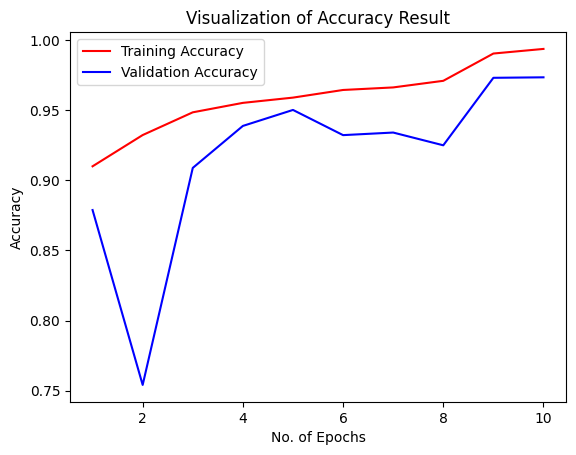

In [ ]:
epochs=[i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs,training_history.history['accuracy'], color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue',label='Validation Accuracy')
plt.title('Visualization of Accuracy Result')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**13. Some other metrics for model evaluation**

In [ ]:
class_name=val_dataset.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_dir = "/content/plantvillage_data/PlantVillage/test"

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(128, 128),
    batch_size=8,
    shuffle=False  # important for correct y_true order
)

Found 2185 files belonging to 38 classes.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
y_true = np.concatenate([np.argmax(y, axis=1) for x, y in test_dataset], axis=0)

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        11
           3       0.95      0.95      0.95        66
           4       0.98      0.98      0.98        60
           5       1.00      1.00      1.00        42
           6       0.97      1.00      0.99        34
           7       0.77      0.95      0.85        21
           8       1.00      0.98      0.99        48
           9       0.97      0.85      0.91        40
          10       1.00      1.00      1.00        47
          11       0.96      0.94      0.95        48
          12       0.96      0.98      0.97        56
          13       0.98      0.98      0.98        43
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00       221
          16       0.96      0.99      0.97        92
          17       0.94    

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.9730
Precision: 0.9738
Recall:    0.9730
F1 Score:  0.9729


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_true, y_pred)
cm

array([[ 22,   0,   0, ...,   0,   0,   0],
       [  0,  24,   0, ...,   0,   0,   0],
       [  0,   0,  11, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 211,   0,   0],
       [  0,   0,   0, ...,   0,  15,   0],
       [  0,   0,   0, ...,   0,   0,  64]])

**14. Confusion Matrix Visualization**

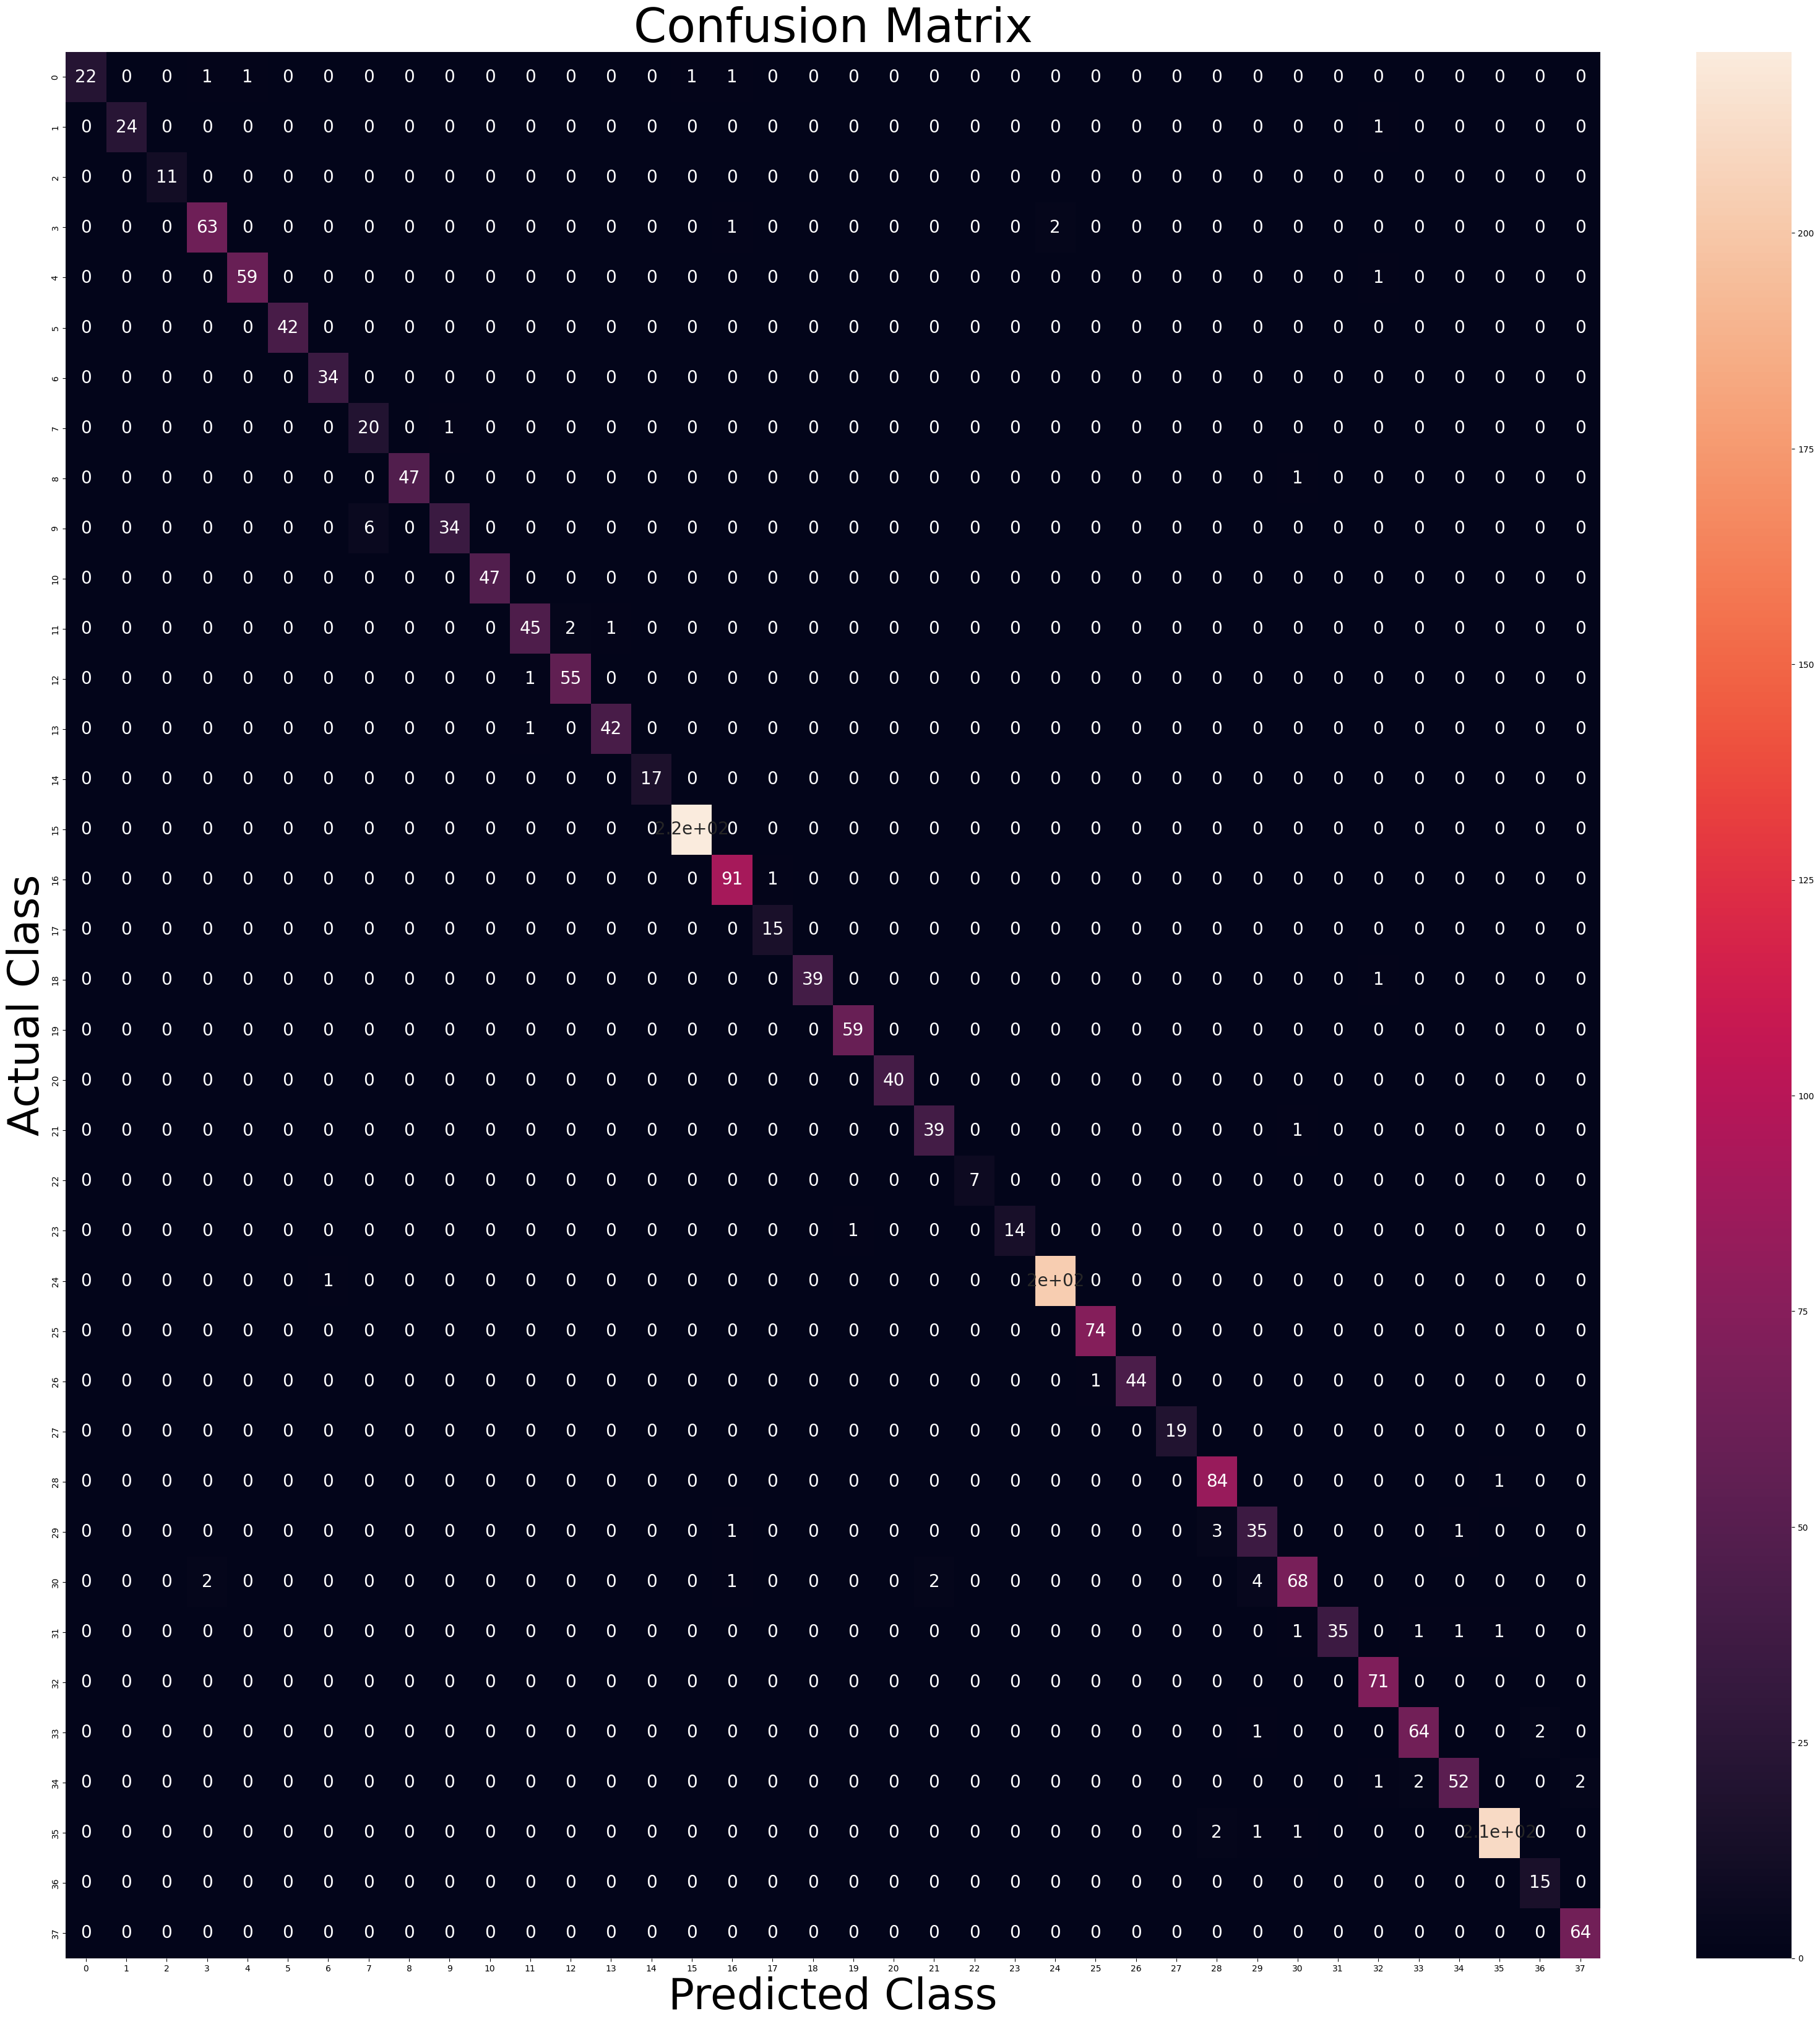

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={"size": 20})
plt.xlabel("Predicted Class", fontsize=50)
plt.ylabel("Actual Class",fontsize=50)
plt.title("Confusion Matrix", fontsize=55)
plt.show()

In [ ]:
model=tf.keras.models.load_model("/content/plant_disease_detection_model.keras")

***15. Visualizing single image of test set***

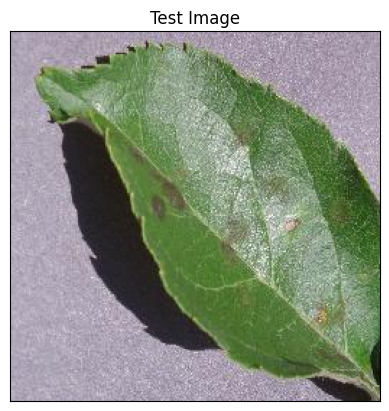

In [ ]:
image_path = "/content/plantvillage_data/PlantVillage/test/Apple___Apple_scab/0b170906-9436-4c0d-84c1-c396ad9d909b___FREC_Scab 3101.JPG"
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

**16. Testing Model**

In [ ]:
image=tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
prediction=model.predict(input_arr)
prediction, prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


(array([[9.980e-01, 0.000e+00, 0.000e+00, 1.727e-03, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 2.265e-06, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 2.384e-07, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00]], dtype=float16),
 (1, 38))

In [ ]:
result_index=np.argmax(prediction)
result_index

np.int64(0)

In [ ]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

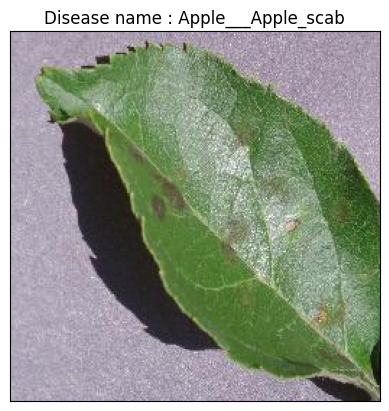

In [ ]:
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease name : {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model_prediction

'Apple___Apple_scab'